In [16]:
import os
import geopandas
import leafmap.kepler as leafmap
from dotenv import load_dotenv,find_dotenv
import matplotlib.pyplot as plt
load_dotenv(find_dotenv())

True

In [2]:
con = leafmap.connect_postgis(database=os.getenv('DATABASE'), host=os.getenv('DBHOST'), user=os.getenv('DBUSER'), password=os.getenv('DBPASSWORD'))
# sql_Q = "SELECT * FROM public.utility"
sql_Q = "SELECT u.id, c.cat_name, u.sub_type, u.lat, u.lon, u.timestamp, u.geometry, u.effect, u.description, u.solved, u.solved_time FROM public.utility u INNER JOIN public.categories c ON c.id=u.type where c.cat_name='Water'"
fires = leafmap.read_postgis(sql_Q, con, geom_col='geometry').to_crs("EPSG:3857")

In [3]:
# fires = geopandas.read_file("../Data/Facilities/DemoCairo.gpkg", layer='fire').to_crs("EPSG:3857") #Point
# facilities = geopandas.read_file("../Data/Facilities/DemoCairo.gpkg", layer='facilities').to_crs("EPSG:3857") #Point
facilities = geopandas.read_file("../Data/Facilities/Incidents.gpkg", layer='Incidents').to_crs("EPSG:3857") #Point
# admin_poly = geopandas.read_file("../Data/Facilities/DemoCairo.gpkg", layer='NewCairoPolyDemo').to_crs("EPSG:3857") #Polygon
admin_poly = geopandas.read_file("../Data/Facilities/Admin3Poly.gpkg", layer='All-Admin-Area-Egypt').to_crs("EPSG:3857")  # Polygon
fires.head(50)
facilities.head(50)

,osm_id,code,fclass,name,email,phone,geometry
0,31272168,5206,motorway_junction,None,org2@youssefharby.com,01040600508,POINT (3492086.393 3517769.836)
1,31321879,5204,crossing,None,org2@youssefharby.com,01040600508,POINT (3475200.228 3654917.638)
2,31321880,5204,crossing,None,org2@youssefharby.com,01040600508,POINT (3475213.575 3654925.691)
3,32521406,5206,motorway_junction,None,org2@youssefharby.com,01040600508,POINT (3492440.188 3517950.768)
4,32537487,5204,crossing,None,org2@youssefharby.com,01040600508,POINT (3485775.668 3515211.387)
5,32537745,5201,traffic_signals,None,org2@youssefharby.com,01040600508,POINT (3485720.476 3515252.378)
6,32538015,5201,traffic_signals,ميدان الجامع,org2@youssefharby.com,01040600508,POINT (3487421.293 3515956.264)
7,33471021,5250,fuel,شل,org2@youssefharby.com,01040600508,POINT (3493226.237 3513679.711)
8,33471101,5206,motorway_junction,None,org2@youssefharby.com,01040600508,POINT (3518426.699 3517620.396)
9,34712107,5250,fuel,Misr Petrol,org2@youssefharby.com,01040600508,POINT (3465140.797 3501848.554)


In [4]:
# fires = geopandas.read_file("../Data/Facilities/DemoCairo.gpkg", layer='fire').to_crs("EPSG:3857") #Point
# admin_poly = geopandas.read_file("../Data/Facilities/DemoCairo.gpkg", layer='NewCairoPolyDemo').to_crs("EPSG:3857") #Polygon
# fires.head(50)
admin_poly["idtest"] = admin_poly.index + 1
admin_poly.head(50)

,adm3_en,adm3_ar,adm3_pcode,adm3_ref,adm3alt1en,adm3alt2en,adm3alt1ar,adm3alt2ar,adm2_en,adm2_ar,...,adm0_en,adm0_ar,adm0_pcode,date,validon,validto,shape_leng,shape_area,geometry,idtest
0,None,الجزيره,EG120918,None,None,None,None,None,Dikirnis,مركز دكرنس,...,Egypt,مِصر,EG,2006-01-01,2017-04-21,None,0.055274,0.000157,"MULTIPOLYGON (((3511515.638 3643652.806, 35115...",1
1,None,الجهاد 4,EG240525,None,None,None,None,None,Markz Al Idwa,مركز العدوة,...,Egypt,مِصر,EG,2006-01-01,2017-04-21,None,0.101889,0.000594,"MULTIPOLYGON (((3421690.272 3342908.962, 34216...",2
2,None,أم الرضا الجديدة,EG110437,None,None,None,None,None,Kafr Sad,مركز كفر سعد,...,Egypt,مِصر,EG,2006-01-01,2017-04-21,None,0.049183,0.000103,"MULTIPOLYGON (((3521136.065 3686124.664, 35205...",3
3,None,رأس محمد,EG350502,None,None,None,None,None,Sharm el-Sheikh,قسم شرم الشيخ,...,Egypt,مِصر,EG,2006-01-01,2017-04-21,None,0.044184,0.000094,"MULTIPOLYGON (((3812019.933 3218627.676, 38121...",4
4,None,مبارك,EG120565,None,None,None,None,None,Sinbillawin,مركز السنبلاوين,...,Egypt,مِصر,EG,2006-01-01,2017-04-21,None,0.044160,0.000122,"MULTIPOLYGON (((3490982.414 3615388.315, 34915...",5
5,None,منطقة الساحل الشمالى,EG330801,None,None,None,None,None,North Coast,قسم الساحل الشمالى-جزء,...,Egypt,مِصر,EG,2006-01-01,2017-04-21,None,0.434483,0.000981,"MULTIPOLYGON (((3270460.467 3618789.688, 32704...",6
6,None,حبران,EG350113,None,None,None,None,None,Al-Tur,قسم الطور,...,Egypt,مِصر,EG,2006-01-01,2017-04-21,None,0.076264,0.000296,"MULTIPOLYGON (((3749531.627 3329873.084, 37474...",7
7,None,مسير,EG150243,None,None,None,None,None,Kafr Al-Shaykh,مركز كفر الشيخ,...,Egypt,مِصر,EG,2006-01-01,2017-04-21,None,0.245078,0.002164,"MULTIPOLYGON (((3456324.563 3642894.500, 34563...",8
8,None,ميعر,EG350122,None,None,None,None,None,Al-Tur,قسم الطور,...,Egypt,مِصر,EG,2006-01-01,2017-04-21,None,0.132403,0.000669,"MULTIPOLYGON (((3762486.910 3325402.917, 37574...",9
9,None,23يوليو,EG140311,None,None,None,None,None,Al Khanka,مركز الخانكة,...,Egypt,مِصر,EG,2006-01-01,2017-04-21,None,0.047720,0.000132,"MULTIPOLYGON (((3490188.036 3524840.497, 34901...",10


In [5]:
fire_And_Admin = geopandas.sjoin(fires,admin_poly, how='inner',op='intersects',)
# fac_And_Admin.rename_geometry('fac_geo', inplace=True)
# fac_And_Admin_for_fire = fac_And_Admin.loc[fac_And_Admin['type']=='Fire']
fire_And_Admin.head(50)

,id,cat_name,sub_type,lat,lon,timestamp,geometry,effect,description,solved,...,adm1_pcode,adm0_en,adm0_ar,adm0_pcode,date,validon,validto,shape_leng,shape_area,idtest
0,1,Water,Leakage,31.206619,29.9627,2022-03-21 02:26:09.395475,POINT (3335432.507 3659611.726),2,NOOO,False,...,EG02,Egypt,مِصر,EG,2006-01-01,2017-04-21,None,0.087254,0.000242,3741


In [6]:
com_dist_count_wifi_locs = fire_And_Admin.groupby(
    ['idtest'], 
    as_index=False,
)['id'].count()
# groupby to count the wifi locations in each community district
# arbitrarily count the rows for doitt_id
com_dist_count_wifi_locs.columns = ['idtest', 'count']
# rename the column
com_dist_count_wifi_locs.head(10)

,idtest,count
0,3741,1


In [7]:
com_dists_wifi_counts = admin_poly.merge(
    com_dist_count_wifi_locs, 
    on='idtest', 
    how='left', 
)
admin_poly.head(50)

,adm3_en,adm3_ar,adm3_pcode,adm3_ref,adm3alt1en,adm3alt2en,adm3alt1ar,adm3alt2ar,adm2_en,adm2_ar,...,adm0_en,adm0_ar,adm0_pcode,date,validon,validto,shape_leng,shape_area,geometry,idtest
0,None,الجزيره,EG120918,None,None,None,None,None,Dikirnis,مركز دكرنس,...,Egypt,مِصر,EG,2006-01-01,2017-04-21,None,0.055274,0.000157,"MULTIPOLYGON (((3511515.638 3643652.806, 35115...",1
1,None,الجهاد 4,EG240525,None,None,None,None,None,Markz Al Idwa,مركز العدوة,...,Egypt,مِصر,EG,2006-01-01,2017-04-21,None,0.101889,0.000594,"MULTIPOLYGON (((3421690.272 3342908.962, 34216...",2
2,None,أم الرضا الجديدة,EG110437,None,None,None,None,None,Kafr Sad,مركز كفر سعد,...,Egypt,مِصر,EG,2006-01-01,2017-04-21,None,0.049183,0.000103,"MULTIPOLYGON (((3521136.065 3686124.664, 35205...",3
3,None,رأس محمد,EG350502,None,None,None,None,None,Sharm el-Sheikh,قسم شرم الشيخ,...,Egypt,مِصر,EG,2006-01-01,2017-04-21,None,0.044184,0.000094,"MULTIPOLYGON (((3812019.933 3218627.676, 38121...",4
4,None,مبارك,EG120565,None,None,None,None,None,Sinbillawin,مركز السنبلاوين,...,Egypt,مِصر,EG,2006-01-01,2017-04-21,None,0.044160,0.000122,"MULTIPOLYGON (((3490982.414 3615388.315, 34915...",5
5,None,منطقة الساحل الشمالى,EG330801,None,None,None,None,None,North Coast,قسم الساحل الشمالى-جزء,...,Egypt,مِصر,EG,2006-01-01,2017-04-21,None,0.434483,0.000981,"MULTIPOLYGON (((3270460.467 3618789.688, 32704...",6
6,None,حبران,EG350113,None,None,None,None,None,Al-Tur,قسم الطور,...,Egypt,مِصر,EG,2006-01-01,2017-04-21,None,0.076264,0.000296,"MULTIPOLYGON (((3749531.627 3329873.084, 37474...",7
7,None,مسير,EG150243,None,None,None,None,None,Kafr Al-Shaykh,مركز كفر الشيخ,...,Egypt,مِصر,EG,2006-01-01,2017-04-21,None,0.245078,0.002164,"MULTIPOLYGON (((3456324.563 3642894.500, 34563...",8
8,None,ميعر,EG350122,None,None,None,None,None,Al-Tur,قسم الطور,...,Egypt,مِصر,EG,2006-01-01,2017-04-21,None,0.132403,0.000669,"MULTIPOLYGON (((3762486.910 3325402.917, 37574...",9
9,None,23يوليو,EG140311,None,None,None,None,None,Al Khanka,مركز الخانكة,...,Egypt,مِصر,EG,2006-01-01,2017-04-21,None,0.047720,0.000132,"MULTIPOLYGON (((3490188.036 3524840.497, 34901...",10


In [8]:
com_dists_wifi_counts.isnull().sum()

adm3_en       5716
adm3_ar          0
adm3_pcode       0
adm3_ref      5716
adm3alt1en    5716
adm3alt2en    5716
adm3alt1ar    5716
adm3alt2ar    5716
adm2_en          0
adm2_ar          0
adm2_pcode       0
adm1_en          0
adm1_ar          0
adm1_pcode       0
adm0_en          0
adm0_ar          0
adm0_pcode       0
date             0
validon          0
validto       5716
shape_leng       0
shape_area       0
geometry         0
idtest           0
count         5715
dtype: int64

In [9]:
com_dists_wifi_counts['count'].fillna(
    0, 
    inplace=True,
)  

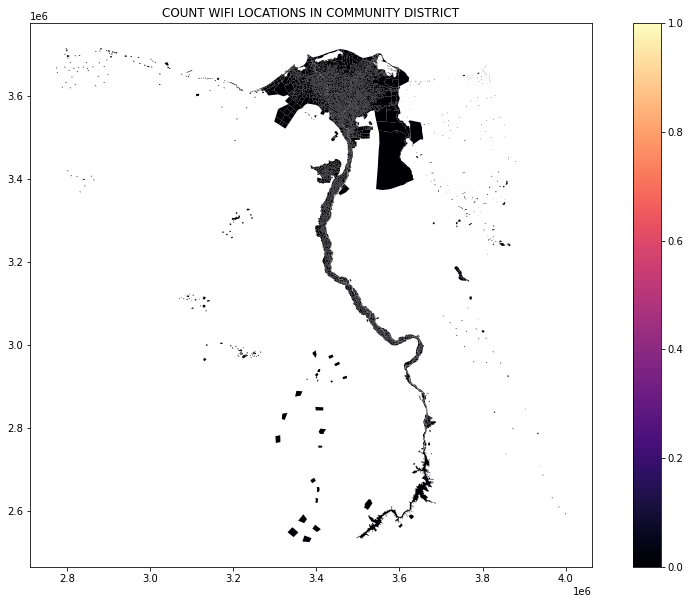

In [10]:
com_dists_wifi_counts.plot(
    column='count', 
    figsize=(15, 10),
    cmap='magma',
    legend=True,
)
plt.title('COUNT WIFI LOCATIONS IN COMMUNITY DISTRICT');

In [11]:
com_dists_wifi_counts.to_file('../Data/Facilities/DemoCairoResults.gpkg', driver='GPKG', layer='count')

In [12]:
m = leafmap.Map()

In [13]:
config = "../CONFIGs/count/config-sj-try1.json"

In [17]:
m.add_gdf(fire_And_Admin, layer_name="Final Result")
m.add_gdf(com_dists_wifi_counts, layer_name="Admin Area", config=config)
m

Map(config={'version': 'v1', 'config': {'visState': {'filters': [], 'layers': [{'id': 'zjb5bn', 'type': 'point…

In [15]:
# m.save_config("../CONFIGs/count/config-sj-try4.json")